# A classification task: record label recognition


In [1]:
#Basic imports
import os
import matplotlib.pyplot as plt
import essentia.standard as ess
import essentia
import numpy as np
import sys

In [2]:
# Raw-data preprocess analysis parameters
fs = 44100
windowSize = 4096 * 4
hopSize = 4096 * 2
NRG_threshold_ratio = 0.01 #threshold expressed as ratio with respect to the maximum value
V_threshold = 0.01 #waveform threshold value
#Let's put in a container to be able to use as a single argument in function calls
params = {"fs":fs, "windowSize":windowSize, "hopSize":hopSize, "V_threshold":V_threshold}

## Analysis and preprocessing of features



In [3]:
import pandas as pd

In [4]:
#Read 
file = 'ada_vs_abs/data_NRG_ada_30s.csv'
data = pd.read_csv(file)
#Let's see the first lines of our data
print(data.shape)
data.head()

(1035, 111)


,average_loudness,barkbands_crest.mean,barkbands_crest.stdev,barkbands_flatness_db.mean,barkbands_flatness_db.stdev,barkbands_kurtosis.mean,barkbands_kurtosis.stdev,barkbands_skewness.mean,barkbands_skewness.stdev,barkbands_spread.mean,...,tonal.hpcp_entropy.mean,tonal.hpcp_entropy.stdev,tonal.key_edma.strength,tonal.key_krumhansl.strength,tonal.key_temperley.strength,tonal.tuning_diatonic_strength,tonal.tuning_equal_tempered_deviation,tonal.tuning_frequency,tonal.tuning_nontempered_energy_ratio,label
0,0.988186,20.478498,4.089674,0.379634,0.117483,160.641403,198.192886,8.975998,5.951560,12.921071,...,2.388727,0.630828,0.597704,0.590780,0.576712,0.519700,0.264084,434.193115,0.914482,suaraarchive
1,0.968379,15.320263,6.943198,0.171818,0.090113,26.312613,69.235451,3.349055,3.365176,29.381922,...,2.579776,0.895548,0.437140,0.432375,0.453034,0.617205,0.201986,434.193115,0.857048,suaraarchive
2,0.961911,14.853801,6.487042,0.309190,0.134920,36.727467,61.274410,3.712230,2.883528,12.519576,...,2.466795,0.769552,0.639024,0.656498,0.667925,0.449289,0.139628,434.193115,0.786461,suaraarchive
3,0.984195,19.392551,4.652277,0.236884,0.071677,70.987419,86.121933,6.727059,3.746682,11.425290,...,2.289503,0.803594,0.702167,0.709757,0.708595,0.596609,0.109998,440.254242,0.737786,suaraarchive
4,0.989017,15.688944,7.368422,0.212260,0.122203,40.260254,53.379383,4.249978,2.831521,17.101896,...,2.521369,0.769857,0.608317,0.604574,0.602309,0.455554,0.209978,434.193115,0.915794,suaraarchive


In [5]:
data.isnull().sum().sum()#sums a matrix of True/False values obtained by checking if each value is Nan

0

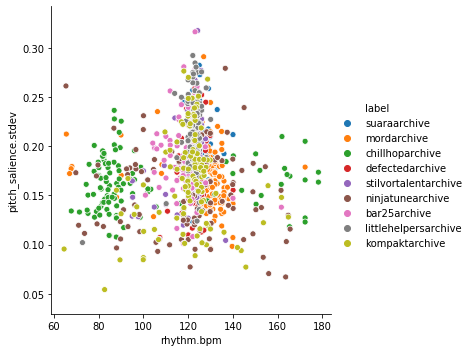

In [6]:
import seaborn as sns
# hue -> Grouping variable that will produce elements with different colors
# style -> Grouping variable that will produce elements with different styles
sns.relplot(x = "rhythm.bpm", y = "pitch_salience.stdev", hue = "label", data = data);

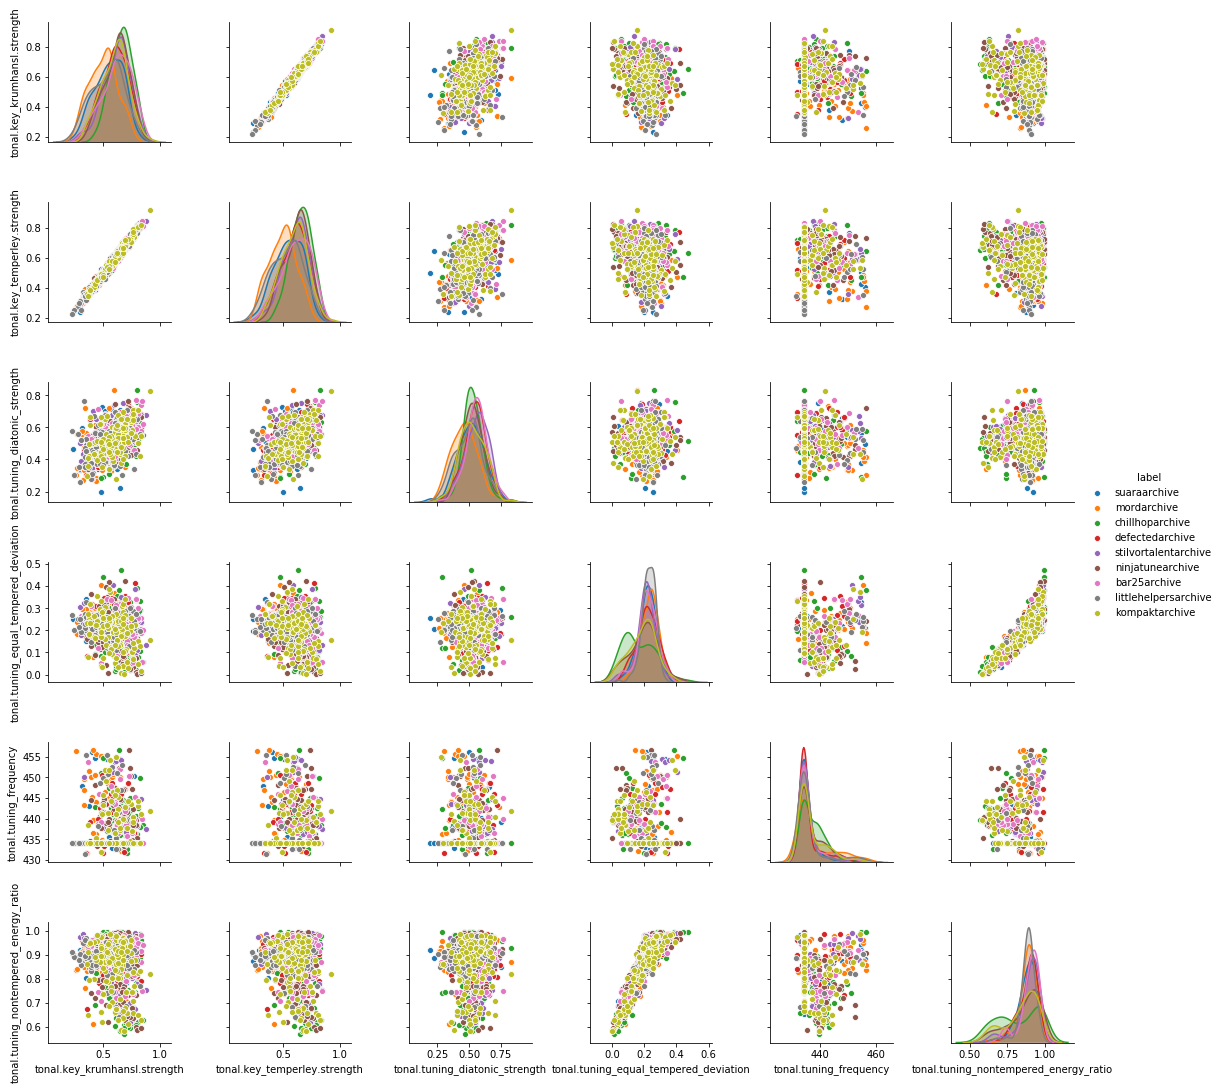

In [7]:
sns.pairplot(data.iloc[:, -7:], hue = "label");

In [8]:
#Descriptive statistics of the features:
data.describe()

,average_loudness,barkbands_crest.mean,barkbands_crest.stdev,barkbands_flatness_db.mean,barkbands_flatness_db.stdev,barkbands_kurtosis.mean,barkbands_kurtosis.stdev,barkbands_skewness.mean,barkbands_skewness.stdev,barkbands_spread.mean,...,tonal.hpcp_crest.stdev,tonal.hpcp_entropy.mean,tonal.hpcp_entropy.stdev,tonal.key_edma.strength,tonal.key_krumhansl.strength,tonal.key_temperley.strength,tonal.tuning_diatonic_strength,tonal.tuning_equal_tempered_deviation,tonal.tuning_frequency,tonal.tuning_nontempered_energy_ratio
count,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,...,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000
mean,0.952248,15.873745,5.672438,0.264289,0.107595,72.068507,144.493509,4.462619,4.029200,14.609930,...,5.616286,2.159383,0.720389,0.588068,0.589004,0.587099,0.525658,0.210091,436.736802,0.874860
std,0.075543,2.717432,1.054826,0.081654,0.037502,76.931084,179.202921,2.053157,2.177337,8.058646,...,1.131823,0.359946,0.093981,0.125688,0.126367,0.125067,0.097683,0.074196,4.959479,0.090125
min,0.094679,8.371400,1.532150,0.079238,0.018111,0.257622,1.411797,0.308921,0.396244,0.456950,...,3.149999,1.150857,0.377700,0.219322,0.222864,0.228071,0.194460,0.002877,431.443085,0.569442
25%,0.952494,13.993185,4.944035,0.206684,0.082220,22.019686,39.529701,2.990434,2.420218,8.550832,...,4.782813,1.896354,0.655909,0.504541,0.501116,0.501357,0.462929,0.172651,434.193115,0.845392
50%,0.975928,15.772546,5.666733,0.255874,0.104174,48.996506,91.750435,4.229000,3.671598,13.377729,...,5.411049,2.127462,0.723492,0.605286,0.605114,0.600800,0.529626,0.217818,434.193115,0.897670
75%,0.984717,17.885271,6.400847,0.312379,0.129777,93.932812,192.648407,5.688199,5.258108,19.132484,...,6.267091,2.425113,0.778683,0.679911,0.682141,0.679774,0.591802,0.257583,437.718536,0.936963
max,0.990216,24.052708,8.728979,0.585487,0.294311,661.860596,2247.064209,15.467979,18.644485,70.538437,...,9.885797,3.345558,1.103085,0.898272,0.910610,0.918201,0.831871,0.472213,456.570251,0.996004




### Preprocessing of the features

**Normalisation of the features**

In [9]:
data_modif = data.copy()
#Let's use sklearn's preprocessing tools for applying normalisation to features
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data_modif.iloc[:,:110] = min_max_scaler.fit_transform(data.iloc[:,:110].values)

In [10]:
data_modif.describe()

,average_loudness,barkbands_crest.mean,barkbands_crest.stdev,barkbands_flatness_db.mean,barkbands_flatness_db.stdev,barkbands_kurtosis.mean,barkbands_kurtosis.stdev,barkbands_skewness.mean,barkbands_skewness.stdev,barkbands_spread.mean,...,tonal.hpcp_crest.stdev,tonal.hpcp_entropy.mean,tonal.hpcp_entropy.stdev,tonal.key_edma.strength,tonal.key_krumhansl.strength,tonal.key_temperley.strength,tonal.tuning_diatonic_strength,tonal.tuning_equal_tempered_deviation,tonal.tuning_frequency,tonal.tuning_nontempered_energy_ratio
count,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,...,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000
mean,0.957603,0.478426,0.575293,0.365535,0.323985,0.108541,0.063715,0.274008,0.199085,0.201950,...,0.366146,0.459528,0.472424,0.543112,0.532377,0.520232,0.519599,0.441504,0.210677,0.715999
std,0.084355,0.173291,0.146568,0.161292,0.135778,0.116280,0.079800,0.135441,0.119318,0.114990,...,0.168031,0.164007,0.129560,0.185121,0.183741,0.181222,0.153250,0.158087,0.197375,0.211281
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.957878,0.358502,0.474082,0.251747,0.232113,0.032893,0.016974,0.176892,0.110913,0.115492,...,0.242408,0.339680,0.383533,0.420089,0.404585,0.395992,0.421187,0.361732,0.109445,0.646916
50%,0.984045,0.471972,0.574501,0.348912,0.311597,0.073668,0.040228,0.258596,0.179489,0.184368,...,0.335677,0.444983,0.476701,0.568473,0.555801,0.540085,0.525823,0.457968,0.109445,0.769473
75%,0.993859,0.606701,0.676506,0.460526,0.404294,0.141588,0.085159,0.354856,0.266429,0.266483,...,0.462765,0.580606,0.552788,0.678384,0.667800,0.654519,0.623369,0.542695,0.249748,0.861588
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
#input values put in a matrix, there are 110 features
x = data_modif.iloc[:,:110]
#Creating output values
data_modif.label = pd.Categorical(data_modif.label)#convert to categorical data
y = np.array(data_modif.label.cat.codes) #create label encoded outputs
#Print the first sample
print("Features of the first sample: ", x.values)
print("Class of the first sample: ", y[0])

Features of the first sample:  [[0.99773399 0.77207199 0.35536821 ... 0.55654481 0.10944451 0.80888542]
 [0.97561621 0.44313033 0.75186559 ... 0.42423515 0.10944451 0.67424264]
 [0.96839373 0.41338395 0.68848263 ... 0.29136994 0.10944451 0.5087634 ]
 ...
 [0.99033825 0.36826535 0.52951107 ... 0.541463   0.47253048 0.65025419]
 [0.98359412 0.39226997 0.46287843 ... 0.54155126 0.10944451 0.89767763]
 [0.94188896 0.14677192 0.27906662 ... 0.15330398 0.56448825 0.39220494]]
Class of the first sample:  8


In [12]:
print(y.shape)

(1035,)


In [13]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=110)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(100,'Score'))  #print k best features

                                     Specs      Score
49                 silence_rate_60dB.stdev  46.743046
19                 erbbands_kurtosis.stdev  39.537191
45                 silence_rate_20dB.stdev  36.947222
18                  erbbands_kurtosis.mean  31.659999
21                 erbbands_skewness.stdev  30.187001
..                                     ...        ...
28          loudness_ebu128.momentary.mean   4.856318
108                 tonal.tuning_frequency   4.454693
109  tonal.tuning_nontempered_energy_ratio   4.300804
90    rhythm.bpm_histogram_second_peak_bpm   4.138584
107  tonal.tuning_equal_tempered_deviation   3.979690

[100 rows x 2 columns]


In [14]:
X_new = bestfeatures.fit_transform(x, y)

In [15]:
print ( X_new.shape)

(1035, 110)


In [16]:
from numpy import save
save('y.npy', y)

## SVM TRAINING AND TESTING

In [17]:
#All output values: 
print(y)

[8 8 8 ... 3 3 3]


**Splitting data into train and test subsets**

In [18]:
#Let's split data into test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.20, random_state = 42) #random_state = 20 or 42

In [19]:
print("Size of train features matrix: ",X_train.shape, ", Size of train output vector: ",y_train.shape)
print("Size of test features matrix: ",X_test.shape, ", Size of test output vector: ",y_test.shape)

Size of train features matrix:  (828, 110) , Size of train output vector:  (828,)
Size of test features matrix:  (207, 110) , Size of test output vector:  (207,)


**Defining the machine learning model and training it**

Now we can train a machine learning model. Let's pick a Support Vector Machine (SVM) model and feed our data to train it.

In [20]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate 
#clf = svm.SVC(gamma = 1 / (X_train.shape[-1] * X_train.var()))
tuned_parameters = [{'gamma': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]}]
                    
 #cross-validation for gamma:
clf = GridSearchCV(svm.SVC(), tuned_parameters, cv=10) #C-Support Vector Classification based on libsvm

scores = cross_validate (clf, X_new, y, cv=10, return_estimator=True)
clf= scores ['estimator'][int(np.argmax(scores['test_score']))]
clf.fit(X_train, y_train)   


print(clf.best_params_)                    

{'gamma': 0.3}


**Testing the model**



In [21]:
y_pred = clf.predict(X_test)

In [22]:
#Let's check for each sample in the test set if prediction matches the true class information
y_test == y_pred

array([False, False,  True, False, False,  True, False,  True,  True,
        True,  True, False, False,  True, False, False,  True, False,
        True, False, False,  True, False,  True, False,  True,  True,
        True, False,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True, False, False, False, False, False,
       False,  True, False, False,  True, False, False, False,  True,
        True, False,  True, False, False, False, False, False, False,
        True, False, False,  True, False,  True,  True,  True, False,
       False,  True, False,  True,  True,  True,  True,  True, False,
       False, False, False,  True, False, False, False, False,  True,
        True,  True, False, False, False, False, False, False, False,
        True, False,  True, False, False, False,  True, False,  True,
       False, False, False, False,  True,  True,  True,  True, False,
        True, False, False,  True,  True,  True,  True,  True, False,
        True, False,

In [23]:
#Data is balanced, so you can use accuracy as a measure:
print("accuracy: ", np.sum(y_test == y_pred)/len(y_test))

accuracy:  0.46859903381642515


**Observation:** the accuracy looks good but keep in mind that we have a small dataset and simply obtained a random subset for testing


As the final step, let's also print the **confusion matrix**

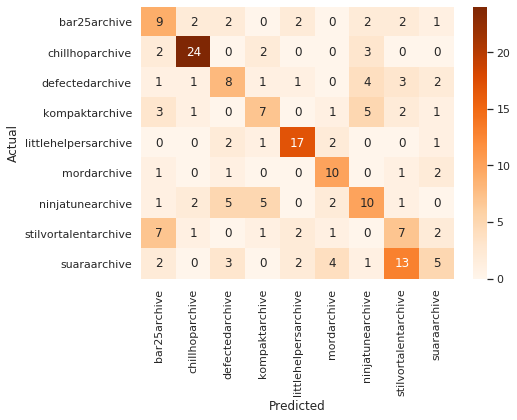

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

classes = np.unique(data_modif.label)
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = classes, index = classes)
conf_mat.index.name = 'Actual'
conf_mat.columns.name = 'Predicted'
plt.figure(figsize = (7, 5))
sns.set(font_scale = 1)
sns.heatmap(conf_mat, cmap = "Oranges", annot_kws = {"size": 12}, annot = True);

In [25]:
from sklearn.metrics import classification_report
target_names= ['bar25', 'chillhop', 'defected', 'kompakt','littlehelpers', 'mord', 'ninjatune', 'stilvortalent', 'suara']
report = classification_report(y_test,y_pred, target_names=target_names, output_dict= True)
print(classification_report(y_test,y_pred, target_names=target_names))

               precision    recall  f1-score   support

        bar25       0.35      0.45      0.39        20
     chillhop       0.77      0.77      0.77        31
     defected       0.38      0.38      0.38        21
      kompakt       0.41      0.35      0.38        20
littlehelpers       0.71      0.74      0.72        23
         mord       0.50      0.67      0.57        15
    ninjatune       0.40      0.38      0.39        26
stilvortalent       0.24      0.33      0.28        21
        suara       0.36      0.17      0.23        30

     accuracy                           0.47       207
    macro avg       0.46      0.47      0.46       207
 weighted avg       0.47      0.47      0.46       207



In [26]:
df = pd.DataFrame(report).transpose()
df = df['f1-score']
df = df.iloc[0:9]
df = pd.DataFrame(df)
df = df.rename(columns={'f1-score': '30s_ada'})
print(df)
#df1['RecordLabel'] = df1.index
#print(len(df1.columns))

print(type(df))

                30s_ada
bar25          0.391304
chillhop       0.774194
defected       0.380952
kompakt        0.378378
littlehelpers  0.723404
mord           0.571429
ninjatune      0.392157
stilvortalent  0.280000
suara          0.227273
<class 'pandas.core.frame.DataFrame'>


## SVM ABS

In [27]:
#Read 
file = 'ada_vs_abs/data_30s_abs.csv'
data = pd.read_csv(file)
#Let's see the first lines of our data
print(data.shape)
data.head()

(1035, 111)


,average_loudness,barkbands_crest.mean,barkbands_crest.stdev,barkbands_flatness_db.mean,barkbands_flatness_db.stdev,barkbands_kurtosis.mean,barkbands_kurtosis.stdev,barkbands_skewness.mean,barkbands_skewness.stdev,barkbands_spread.mean,...,tonal.hpcp_entropy.mean,tonal.hpcp_entropy.stdev,tonal.key_edma.strength,tonal.key_krumhansl.strength,tonal.key_temperley.strength,tonal.tuning_diatonic_strength,tonal.tuning_equal_tempered_deviation,tonal.tuning_frequency,tonal.tuning_nontempered_energy_ratio,label
0,0.985963,16.988277,6.152028,0.234508,0.104749,54.934834,111.080116,4.672720,4.311407,22.171335,...,1.935214,0.825875,0.671964,0.650649,0.601438,0.614866,0.230020,434.193115,0.894006,suaraarchive
1,0.981879,16.154875,7.029408,0.248749,0.129977,139.366715,373.698608,6.428804,7.328341,24.018057,...,2.261895,0.816613,0.467872,0.477233,0.485559,0.560867,0.263837,434.193115,0.917605,suaraarchive
2,0.987341,17.704046,5.994382,0.221113,0.102747,61.243366,91.167221,5.480647,4.225255,16.820066,...,2.214764,0.626813,0.407111,0.422130,0.442967,0.613699,0.240900,434.193115,0.956878,suaraarchive
3,0.988173,18.196672,5.676707,0.250346,0.116325,131.642410,197.429703,7.458259,6.250255,25.070768,...,2.151182,0.751411,0.538804,0.536238,0.531833,0.583113,0.253850,434.193115,0.934906,suaraarchive
4,0.974610,16.868780,5.965635,0.272079,0.128965,67.502502,97.909622,5.588888,4.365337,18.521112,...,2.586561,0.888847,0.626011,0.628222,0.619442,0.556919,0.238008,434.193115,0.894724,suaraarchive


In [28]:
data.isnull().sum().sum()#sums a matrix of True/False values obtained by checking if each value is Nan

0

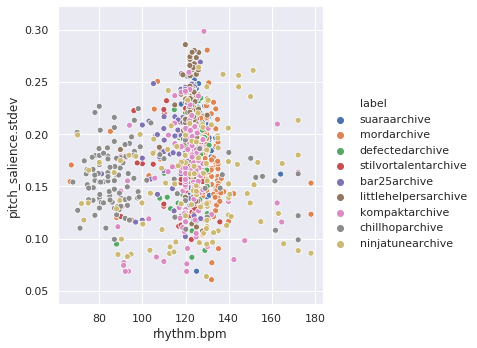

In [29]:
import seaborn as sns
# hue -> Grouping variable that will produce elements with different colors
# style -> Grouping variable that will produce elements with different styles
sns.relplot(x = "rhythm.bpm", y = "pitch_salience.stdev", hue = "label", data = data);

In [30]:
data_modif = data.copy()
#Let's use sklearn's preprocessing tools for applying normalisation to features
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data_modif.iloc[:,:110] = min_max_scaler.fit_transform(data.iloc[:,:110].values)

In [31]:
#input values put in a matrix, there are 110 features
x = data_modif.iloc[:,:110]
#Creating output values
data_modif.label = pd.Categorical(data_modif.label)#convert to categorical data
y = np.array(data_modif.label.cat.codes) #create label encoded outputs
#Print the first sample
print("Features of the first sample: ", x.values)
print("Class of the first sample: ", y[0])

Features of the first sample:  [[0.99580082 0.62858924 0.62376039 ... 0.49492942 0.11818908 0.7531477 ]
 [0.99166978 0.57740937 0.76054089 ... 0.56782885 0.11818908 0.80897225]
 [0.99719478 0.67254514 0.599184   ... 0.518384   0.11818908 0.90187227]
 ...
 [0.98624355 0.56612256 0.5483726  ... 0.38825126 0.20736905 0.65730876]
 [0.98084167 0.59086628 0.57181089 ... 0.67647132 0.11818908 0.93065097]
 [0.99565998 0.70336201 0.73198501 ... 0.44058589 0.11818908 0.79975125]]
Class of the first sample:  8


In [32]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=110)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(110,'Score'))  #print k best features

                                     Specs      Score
49                 silence_rate_60dB.stdev  52.904380
75                  spectral_rolloff.stdev  32.915049
41                   melbands_spread.stdev  32.887092
21                 erbbands_skewness.stdev  31.174851
10                  barkbands_spread.stdev  27.826430
..                                     ...        ...
89  rhythm.bpm_histogram_first_peak_weight   1.624347
65    spectral_energyband_middle_low.stdev   1.507741
30         loudness_ebu128.short_term.mean   1.433258
0                         average_loudness   0.856595
44                  silence_rate_20dB.mean   0.251267

[110 rows x 2 columns]


In [33]:
X_new = bestfeatures.fit_transform(x, y)
print ( X_new.shape)

(1035, 110)


In [34]:
from numpy import save
save('y.npy', y)

In [35]:
#Let's split data into test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.20, random_state = 42) #random_state = 20 or 42
print("Size of train features matrix: ",X_train.shape, ", Size of train output vector: ",y_train.shape)
print("Size of test features matrix: ",X_test.shape, ", Size of test output vector: ",y_test.shape)

Size of train features matrix:  (828, 110) , Size of train output vector:  (828,)
Size of test features matrix:  (207, 110) , Size of test output vector:  (207,)


In [36]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate 
#clf = svm.SVC(gamma = 1 / (X_train.shape[-1] * X_train.var()))
tuned_parameters = [{'gamma': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]}]
                    
 #cross-validation for gamma:
clf = GridSearchCV(svm.SVC(), tuned_parameters, cv=10) #C-Support Vector Classification based on libsvm

scores = cross_validate (clf, X_new, y, cv=10, return_estimator=True)
clf= scores ['estimator'][int(np.argmax(scores['test_score']))]
clf.fit(X_train, y_train)   


print(clf.best_params_)                    

{'gamma': 0.3}


In [37]:
y_pred = clf.predict(X_test)

In [38]:
#Data is balanced, so you can use accuracy as a measure:
print("accuracy: ", np.sum(y_test == y_pred)/len(y_test))

accuracy:  0.5120772946859904


In [39]:
from sklearn.metrics import classification_report
target_names= ['bar25', 'chillhop', 'defected', 'kompakt','littlehelpers', 'mord', 'ninjatune', 'stilvortalent', 'suara']
report1 = classification_report(y_test,y_pred, target_names=target_names, output_dict= True)
print(classification_report(y_test,y_pred, target_names=target_names))

               precision    recall  f1-score   support

        bar25       0.58      0.71      0.64        21
     chillhop       0.75      0.91      0.82        23
     defected       0.47      0.26      0.33        31
      kompakt       0.47      0.35      0.40        20
littlehelpers       0.67      0.62      0.64        26
         mord       0.67      0.80      0.73        15
    ninjatune       0.31      0.40      0.35        20
stilvortalent       0.36      0.57      0.44        21
        suara       0.35      0.23      0.28        30

     accuracy                           0.51       207
    macro avg       0.51      0.54      0.51       207
 weighted avg       0.51      0.51      0.50       207



In [40]:
df1 = pd.DataFrame(report1).transpose()
print(type(df1))
df1 = df1['f1-score']
df1 = df1.iloc[0:9]
df1 = pd.DataFrame(df1)
df1 = df1.rename(columns={'f1-score': '30s_abs'})
print(df1)
#df1['RecordLabel'] = df1.index
#print(len(df1.columns))

print(type(df1))

<class 'pandas.core.frame.DataFrame'>
                30s_abs
bar25          0.638298
chillhop       0.823529
defected       0.333333
kompakt        0.400000
littlehelpers  0.640000
mord           0.727273
ninjatune      0.347826
stilvortalent  0.444444
suara          0.280000
<class 'pandas.core.frame.DataFrame'>


In [41]:
df_tot = pd.concat([df, df1], axis=1, sort=False)
print(df_tot)

                30s_ada   30s_abs
bar25          0.391304  0.638298
chillhop       0.774194  0.823529
defected       0.380952  0.333333
kompakt        0.378378  0.400000
littlehelpers  0.723404  0.640000
mord           0.571429  0.727273
ninjatune      0.392157  0.347826
stilvortalent  0.280000  0.444444
suara          0.227273  0.280000


In [42]:
df_tot = df_tot.stack(level=0)
print(df_tot)

bar25          30s_ada    0.391304
               30s_abs    0.638298
chillhop       30s_ada    0.774194
               30s_abs    0.823529
defected       30s_ada    0.380952
               30s_abs    0.333333
kompakt        30s_ada    0.378378
               30s_abs    0.400000
littlehelpers  30s_ada    0.723404
               30s_abs    0.640000
mord           30s_ada    0.571429
               30s_abs    0.727273
ninjatune      30s_ada    0.392157
               30s_abs    0.347826
stilvortalent  30s_ada    0.280000
               30s_abs    0.444444
suara          30s_ada    0.227273
               30s_abs    0.280000
dtype: float64


In [43]:
df_tot = pd.DataFrame(df_tot)
print(type(df_tot))
print(df_tot)

<class 'pandas.core.frame.DataFrame'>
                              0
bar25         30s_ada  0.391304
              30s_abs  0.638298
chillhop      30s_ada  0.774194
              30s_abs  0.823529
defected      30s_ada  0.380952
              30s_abs  0.333333
kompakt       30s_ada  0.378378
              30s_abs  0.400000
littlehelpers 30s_ada  0.723404
              30s_abs  0.640000
mord          30s_ada  0.571429
              30s_abs  0.727273
ninjatune     30s_ada  0.392157
              30s_abs  0.347826
stilvortalent 30s_ada  0.280000
              30s_abs  0.444444
suara         30s_ada  0.227273
              30s_abs  0.280000


In [44]:
df_tot.reset_index(inplace=True)
df_tot

,level_0,level_1,0
0,bar25,30s_ada,0.391304
1,bar25,30s_abs,0.638298
2,chillhop,30s_ada,0.774194
3,chillhop,30s_abs,0.823529
4,defected,30s_ada,0.380952
5,defected,30s_abs,0.333333
6,kompakt,30s_ada,0.378378
7,kompakt,30s_abs,0.400000
8,littlehelpers,30s_ada,0.723404
9,littlehelpers,30s_abs,0.640000


In [45]:
df_tot = df_tot.rename(columns={'level_0': 'Record Label', 'level_1':'Excerpt_Type', '0': 'f1-score'}) 
df_tot.columns.values[2] = "f1-score" 
print((df_tot))

     Record Label Excerpt_Type  f1-score
0           bar25      30s_ada  0.391304
1           bar25      30s_abs  0.638298
2        chillhop      30s_ada  0.774194
3        chillhop      30s_abs  0.823529
4        defected      30s_ada  0.380952
5        defected      30s_abs  0.333333
6         kompakt      30s_ada  0.378378
7         kompakt      30s_abs  0.400000
8   littlehelpers      30s_ada  0.723404
9   littlehelpers      30s_abs  0.640000
10           mord      30s_ada  0.571429
11           mord      30s_abs  0.727273
12      ninjatune      30s_ada  0.392157
13      ninjatune      30s_abs  0.347826
14  stilvortalent      30s_ada  0.280000
15  stilvortalent      30s_abs  0.444444
16          suara      30s_ada  0.227273
17          suara      30s_abs  0.280000


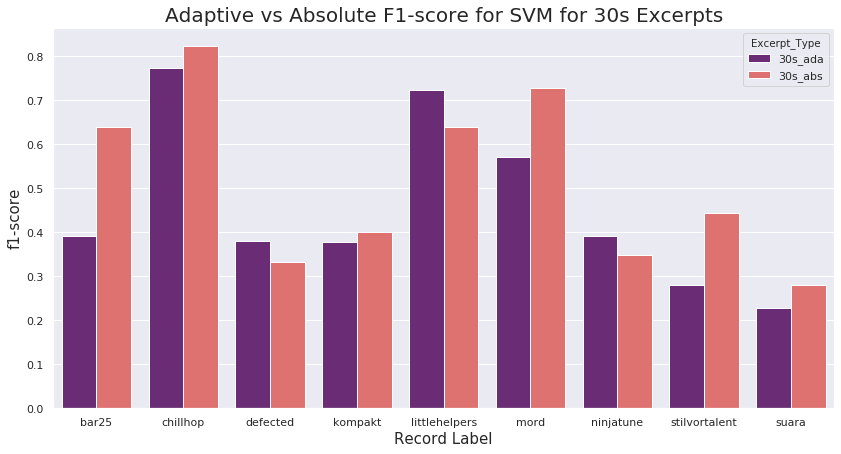

In [46]:
sns.set()
plt.figure(figsize = (14,7))
 
sns.barplot(data=df_tot,x='Record Label', y='f1-score', hue = 'Excerpt_Type', palette = 'magma')
 
plt.title("Adaptive vs Absolute F1-score for SVM for 30s Excerpts", fontsize = 20)
plt.xlabel("Record Label", fontsize = 15)
plt.ylabel("f1-score", fontsize = 15)
 
plt.savefig("Adaptive vs Absolute F1-score for SVM for 30s Excerpts")
plt.show()